In [10]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from livelossplot import PlotLossesKeras


%matplotlib inline

# Задача 1
### Скачиваем датасет cifar10

In [11]:
cifar = tf.keras.datasets.cifar10.load_data()

### Деление на тестовую и валидационную выборку

In [12]:
val_size = 0.01
(train_images_full, train_labels_full), (test_images, test_labels) = cifar
train_images_full, test_images = train_images_full / 255.0, test_images / 255.0

train_images, validation_images, train_labels, validation_labels = train_test_split(train_images_full, train_labels_full, test_size=val_size)


batch_size = 512

train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))  ### your code here
train_dataset = train_dataset.shuffle(buffer_size=1024, reshuffle_each_iteration=True)
train_dataset = train_dataset.batch(batch_size)

val_dataset = tf.data.Dataset.from_tensor_slices((validation_images, validation_labels)) ### your code here
val_dataset = val_dataset.batch(batch_size)

### Модель по типу того, что была в прошлой домашке

In [13]:
input_shape = train_images.shape[-3:]

dense_model = tf.keras.Sequential([
    layers.Flatten(input_shape=input_shape),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

dense_model.compile(
    optimizer='sgd',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

### Summary модели

In [14]:
dense_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_2 (Dense)             (None, 64)                196672    
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 197,322
Trainable params: 197,322
Non-trainable params: 0
_________________________________________________________________


### Обучение модели

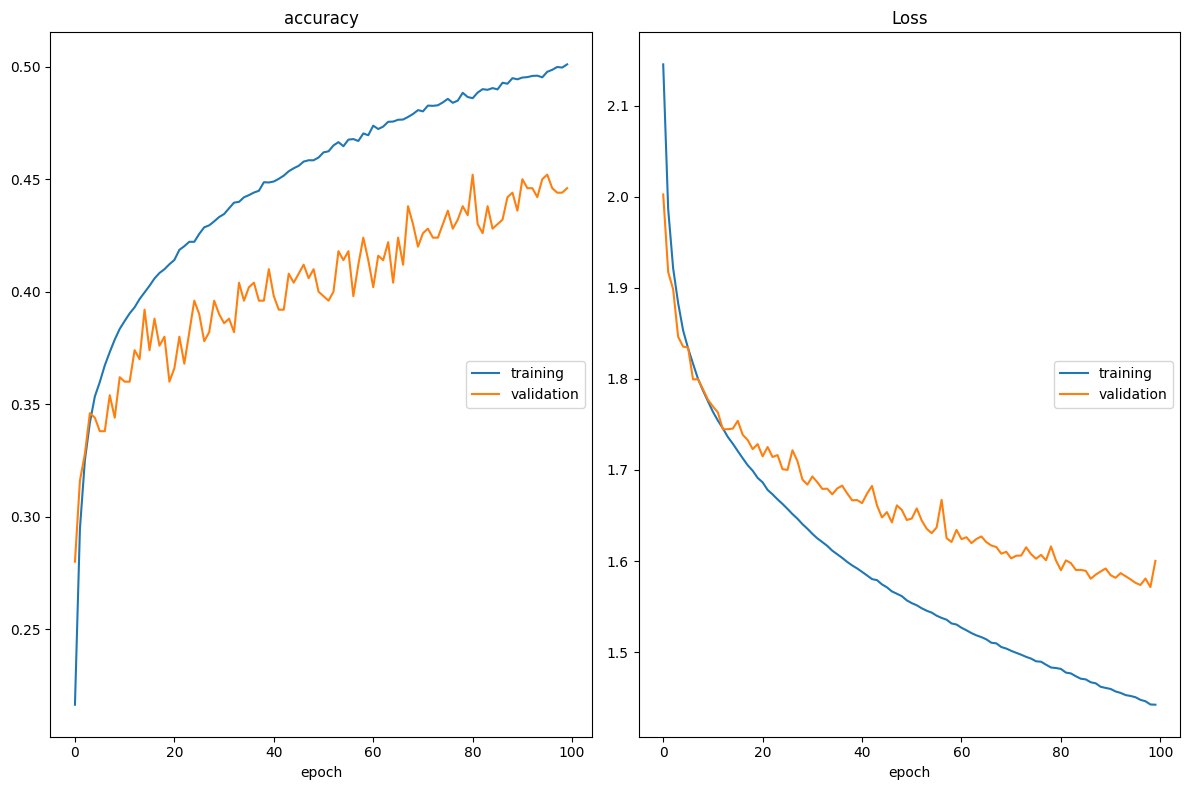

accuracy
	training         	 (min:    0.216, max:    0.501, cur:    0.501)
	validation       	 (min:    0.280, max:    0.452, cur:    0.446)
Loss
	training         	 (min:    1.442, max:    2.145, cur:    1.442)
	validation       	 (min:    1.571, max:    2.002, cur:    1.600)


In [15]:
dense_model_history = dense_model.fit(train_dataset, validation_data=val_dataset, epochs=100, callbacks=[PlotLossesKeras()], verbose=False)